<center><h1>Vehicle Loan Defaulter Prediction</h1></center>

<center><img src="https://genhq.com/wp-content/uploads/2017/12/WhatMillennials-arent-buying-Online.gif" width=450 height=100 /></center>

## TABLE OF CONTENTS

1. Introduction
2. Importing the neccessary libraries
3. Reading the dataset
4. Descriptive analysis
   - Continous variables
   - Categorical variables
   - Data Imbalance check 
5. Feature Engineering
   - Check Varaiable type 
   - Handling missing values
   - Handling Outliers
6. Feature Selection
   - Drop unneccesary variables
   - Correlation matrix
7. Data Preparation
   - One hot encoding (Categorical Variables)
   - Standardize the features
8. ML - Model train and evaluation
9. Conclusion

## 1. Introduction
### Problem statement
Banks run into losses when a customer doesn't pay their vehicle loans on time. Because of this, every year, banks have losses in crores, and this also impacted vehicle loan underwriting and increased vehicle loan rejection rates. So, I take this as an opportunity to look at various attributes such as funded amount, location, loan, balance, etc. to find a pattern for predicting, if a person will be a loan defaulter or not from the available dataset.

Data Link : https://www.kaggle.com/datasets/avikpaul4u/vehicle-loan-default-prediction

### About the dataset
The following train data consists of 41 column and 233154 rows covering three major areas.

#### Areas
  |S.No||Area Type||Column Details|
  |----||-----------||------------------|
  |1||Loanee Information||Demographic data like age, income, Identity proof etc.|
  |2||Loan Information||Disbursal details, amount, EMI, loan to value ratio etc.|
  |3||Bureau data & history||Bureau score, number of active accounts, the status of other loans, credit history etc.|


## 2. Importing the neccesary libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import mean, median, std
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

## 3. Reading the dataset

In [2]:
# import data
df = pd.read_csv('C:/Users/manoharan/Documents/Study/DA-BA Projects/EDA Python - Vehicle Loan Default Prediction/Data.csv')

In [3]:
# Shape of data frame
print(f"Raw data has {df.shape[0]} rows and {df.shape[1]} columns")

Raw data has 233154 rows and 41 columns


In [4]:
# Column details
print('Name of columns\n',df.columns)

Name of columns
 Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')


In [5]:
# Table view
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


## 4. Descriptive Analysis - Statistical Summary
### Continous Variables

In [6]:
# Split the dataset into continous and categorical variables
df_cont = df.loc[:,(df.dtypes == 'float64') | (df.dtypes == 'int64')]
df_cat = df.loc[:,(df.dtypes == 'object')]

# Describe continous variables 
def cont_var_sum(x):
    return pd.Series([x.count(),x.sum(),x.min(),x.mean(),x.median(),x.std(),x.var(),x.quantile(0.10),x.quantile(0.25),
                     x.quantile(0.5),x.quantile(0.75),x.max()], index = ['Count','Sum','Min','Max','Mean','STD','VAR',
                                                                         '10%','25%','50%','75%','Max'])

df_cont.apply(cont_var_sum).round(2)

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
Count,2.331540e+05,2.331540e+05,2.331540e+05,233154.00,233154.00,2.331540e+05,233154.00,2.331540e+05,233154.00,2.331540e+05,...,233154.00,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.00,233154.00,233154.00,233154.00
Sum,1.249513e+11,1.267355e+10,1.768824e+10,17427452.46,17005342.00,4.578826e+09,16094167.00,7.919962e+08,1693221.00,3.612668e+08,...,1689.00,1.265512e+09,1.701074e+09,1.674045e+09,3.055595e+09,7.537133e+07,89026.00,22728.00,48173.00,50611.00
Min,4.174280e+05,1.332000e+04,3.700000e+04,10.03,1.00,1.052400e+04,45.00,1.000000e+00,1.00,1.000000e+00,...,0.00,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00
Max,5.359176e+05,5.435699e+04,7.586507e+04,74.75,72.94,1.963864e+04,69.03,3.396880e+03,7.26,1.549480e+03,...,0.01,5.427790e+03,7.295920e+03,7.180000e+03,1.310548e+04,3.232700e+02,0.38,0.10,0.21,0.22
Mean,5.359785e+05,5.380300e+04,7.094600e+04,76.80,61.00,2.033300e+04,86.00,2.970000e+03,6.00,1.451000e+03,...,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00
STD,6.831569e+04,1.297131e+04,1.894478e+04,11.46,69.83,3.491950e+03,22.14,2.238150e+03,4.48,9.752600e+02,...,0.11,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.96,0.38,0.71,0.41
VAR,4.667034e+09,1.682550e+08,3.589047e+08,131.25,4876.93,1.219371e+07,490.24,5.009304e+06,20.09,9.511346e+05,...,0.01,2.898063e+10,3.354612e+10,3.334002e+10,2.291224e+10,2.419173e+08,0.91,0.15,0.50,0.17
10%,4.412013e+05,3.979400e+04,6.133000e+04,58.86,3.00,1.471000e+04,45.00,7.380000e+02,3.00,2.650000e+02,...,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00
25%,4.767862e+05,4.714500e+04,6.571700e+04,68.88,14.00,1.653500e+04,48.00,1.511000e+03,4.00,7.130000e+02,...,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00
50%,5.359785e+05,5.380300e+04,7.094600e+04,76.80,61.00,2.033300e+04,86.00,2.970000e+03,6.00,1.451000e+03,...,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00


### Categorical Variables

In [7]:
# Describe categorical variables 

def Cat_var_sum(x):
    Mode = x.value_counts().reset_index()
    return pd.Series([x.count(),Mode.iloc[0,0],Mode.iloc[0,1],(round((Mode.iloc[0,1]*100)/x.count(),2))],
                     index = ['Count','Mode','Freq','Per'])

df_cat.apply(Cat_var_sum)

,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,PERFORM_CNS_SCORE_DESCRIPTION,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
Count,233154,225493,233154,233154,233154,233154
Mode,01-01-1988,Self employed,31-10-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon
Freq,2173,127635,8826,116950,119373,119127
Per,0.93,56.6,3.79,50.16,51.2,51.09


### Data Imbalance check 

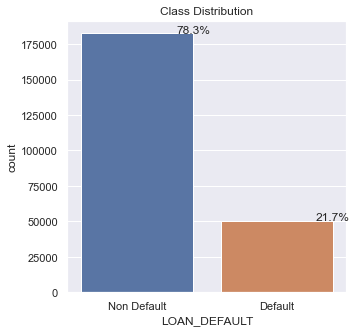

In [8]:
# Value count 
Total_l = len(df['LOAN_DEFAULT'])
Lable = ['Non Default','Default']
# Graph
plt.figure(figsize = (5, 5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = 'LOAN_DEFAULT', data = df)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non Default','Default'])
plt.title('Class Distribution')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/Total_l)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha ='center')

plt.show()

## 5. Feature Engineering
### Drop unnecessary variables

In [9]:
data = df.copy()

data = data.drop(columns = ['UNIQUEID','BRANCH_ID','SUPPLIER_ID','MANUFACTURER_ID','CURRENT_PINCODE_ID','STATE_ID',
                            'EMPLOYEE_CODE_ID','DISBURSAL_DATE'], axis= 1)
data.shape

(233154, 33)

### Check Varaiable type

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   DATE_OF_BIRTH                        233154 non-null  object 
 4   EMPLOYMENT_TYPE                      225493 non-null  object 
 5   MOBILENO_AVL_FLAG                    233154 non-null  int64  
 6   AADHAR_FLAG                          233154 non-null  int64  
 7   PAN_FLAG                             233154 non-null  int64  
 8   VOTERID_FLAG                         233154 non-null  int64  
 9   DRIVING_FLAG                         233154 non-null  int64  
 10  PASSPORT_FLAG                        233154 non-null  int64  
 11  PERFORM_CNS_S

### Findings

There are list for variables which need to be changed to the correct data type to proceed further on analysis.
Find below the data type converstion details of the variables

|S No||Column Names||Current Data Type||Need to be|
|----||------------||-----------------||----------|
|1||'DATE_OF_BIRTH'||Object||Date|
|2||'AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH'||Object||Integer|

In [11]:
### Change data type 

# 1. DATE_OF_BIRTH

data['DATE_OF_BIRTH'] = pd.to_datetime(data['DATE_OF_BIRTH'],format = '%d-%m-%Y')

data[['DATE_OF_BIRTH']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DATE_OF_BIRTH  233154 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.8 MB


In [12]:
# Convert 'DATE_OF_BIRTH' to 'AGE'

now = pd.Timestamp('now')
 
# Age Calculation
data['CUSTOMER_AGE'] = (now - data['DATE_OF_BIRTH'])  

data['CUSTOMER_AGE']= data['CUSTOMER_AGE'].astype(str)
data[['CUSTOMER_AGE','age_waste']] = data['CUSTOMER_AGE'].str.split("days",expand=True)
data['CUSTOMER_AGE']= data['CUSTOMER_AGE'].astype(str).astype(int)
data= data.drop(columns= ['age_waste','DATE_OF_BIRTH'])

days_in_year = 365.2425
data['CUSTOMER_AGE']=(round(data['CUSTOMER_AGE']/days_in_year))
data['CUSTOMER_AGE']=data['CUSTOMER_AGE'].astype(int)

In [13]:
# 2. AVERGAE_ACCT_AGE, CREDIT_HISTORY_LENGTH

# Split year and month
data[['AVG_ACCT_Yr','AVG_ACCT_Month']] = data['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
data[['AVG_ACCT_Month','AVG_ACCT_Month1']] = data['AVG_ACCT_Month'].str.split("mon",expand=True)

# To get avergae age convert both columns 'AVG_ACCT_Yr' & 'AVG_ACCT_Month' to Years and add them
data["AVERAGE_ACCT_AGE"]= round(data["AVG_ACCT_Yr"].astype(str).astype(int)+((data["AVG_ACCT_Month"].astype(str).astype(int))/12),1)

# drop other columns 
data = data.drop(columns =['AVG_ACCT_Yr','AVG_ACCT_Month','AVG_ACCT_Month1'])

# Implement similar steps for CREDIT_HISTORY_LENGTH
data[['CRD_ACCT_Yr','CRD_ACCT_Month']] = data['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
data[['CRD_ACCT_Month','CRD_ACCT_Month1']] = data['CRD_ACCT_Month'].str.split("mon",expand=True)
data["CREDIT_HISTORY_LENGTH"]= round(data["CRD_ACCT_Yr"].astype(str).astype(int)+((data["CRD_ACCT_Month"].astype(str).astype(int))/12),1)
data = data.drop(columns =['CRD_ACCT_Yr','CRD_ACCT_Month','CRD_ACCT_Month1'])


data.head(5)

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,CUSTOMER_AGE
0,50578,58400,89.55,Salaried,1,1,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,38
1,47145,65550,73.23,Self employed,1,1,0,0,0,0,...,0,1991,0,0,1,1.9,1.9,0,1,37
2,53278,61360,89.63,Self employed,1,1,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,37
3,57513,66113,88.48,Self employed,1,1,0,0,0,0,...,0,31,0,0,0,0.7,1.2,1,1,28
4,52378,60300,88.39,Self employed,1,1,0,0,0,0,...,0,0,0,0,0,0.0,0.0,1,1,45


### Handling missing values

Null Values 
        Column name  Total Count  Percentage Miss
0  EMPLOYMENT_TYPE         7661             3.29


<function matplotlib.pyplot.show(close=None, block=None)>

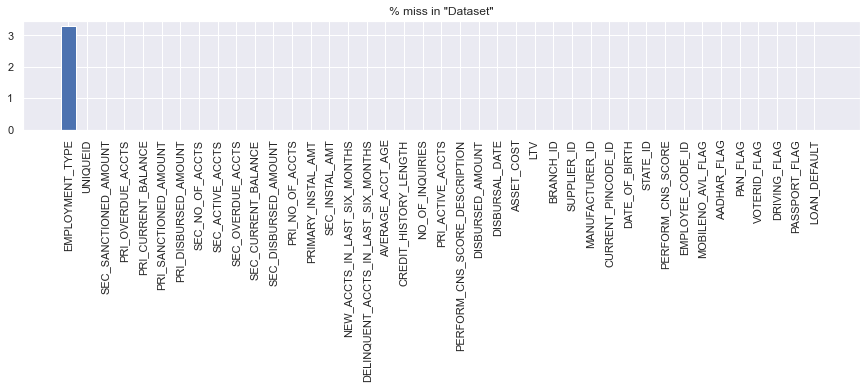

In [14]:
# Check for null values

# Null values in train dataset
null = df.isnull().sum().sort_values(ascending = False)
Total = df.shape[0]
missing_percent = (round(((df.isnull().sum()/Total)*100),2)).sort_values(ascending = False)

missing_data = pd.concat([null,missing_percent],axis=1, keys =['Total Count','Percentage Miss'])

# Reset index and rename columns
missing_data.reset_index(inplace=True)
missing_data = missing_data.rename(columns = {'index':'Column name'})
# Null values count
print("Null Values \n",missing_data.head(1))
# Plot as bar graph
plt.figure(figsize=(15,2))
plt.bar(missing_data['Column name'],missing_data['Percentage Miss'])
plt.title('% miss in "Dataset"')
plt.xticks(rotation=90)
plt.show

#### Deal with missing values in Categorical Features
Now we just have to handle the 'Employment_Type' feature and we will do it in two different ways
1. Delete the entire rows of missing value from 'Employment_Type'.
2. Replace missing values with the most frequent values.

In [15]:
# 1. Delete the entire rows of missing value from 'Employment_Type'

# Check variable details in 'EMPLOYMENT TYPE' 

df_null_unique = data.EMPLOYMENT_TYPE.unique()

print('Variables :\n',df_null_unique)

Variables :
 ['Salaried' 'Self employed' nan]


In [16]:
M1 = df.dropna()

In [17]:
M1_c = pd.get_dummies(M1['EMPLOYMENT_TYPE'], drop_first=True)
M1_c.value_counts()

Self employed
1                127635
0                 97858
dtype: int64

In [18]:
# 2.Replace missing values with the most frequent values.
mode = st.mode(df['EMPLOYMENT_TYPE'])
M2 = df['EMPLOYMENT_TYPE'].fillna(mode)

In [19]:
M2_c = pd.get_dummies(M2, drop_first=True)
M2_c.value_counts()

Self employed
1                135296
0                 97858
dtype: int64

#### Observation:
By comparing both the methods we can able identifiy that droping the missing value rows are much better compared to data imputation using mode.

In [20]:
new_data = data.dropna()

### Handling Outliers

#### Variable understanding 

There are list for variables which can be clasified into continous,categorical data types.
For outlier detection and treatment, our focus will be on Continous variables.

|S No||Column Names|| Data Type|
|----||------------||-----------------|
|1||'DISBURSED_AMOUNT','ASSET_COST',','LTV','CUSTOMER_AGE','PERFORM_CNS_SCORE' + 'All PRI and SEC columns'||Continous|
|2||'EMPLOYMENT_TYPE','PERFORM_CNS_SCORE_DESCRIPTION' + 'All Flag columns'||Categorical|

#### Continous Variables:
   1. Primary variables
        - 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV','CUSTOMER_AGE', 'PERFORM_CNS_SCORE','NEW_ACCTS_IN_LAST_SIX_MONTHS',
          'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH','NO_OF_INQUIRIES'
   2. Secondary variables
        - 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
          'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 
          'SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT'

In [21]:
def plot(feature):
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    sns.distplot(new_data[feature],bins=100)
    
    plt.subplot(1,2,2)
    sns.boxplot(new_data[feature],color='orange')
    
def outlier_data(df, feature):
    #Number of observations in column
    obs = len(new_data[feature])
    print("No. of observations in column: ",obs)

    # calculate summary statistics
    data_mean, data_std, data_median = mean(new_data[feature]), std(new_data[feature]), median(new_data[feature])
    print('Statistics: Mean = %.3f, Std dev = %.3f, Median = %.3f' % (data_mean, data_std, data_median))
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in new_data[feature] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    
def impute_outlier_median(x):
    if x <= lower:
        return(data_median)
    elif x >= upper:
        return(data_median)
    else:
        return(x)

def impute_outlier_mean(x):
    if x <= lower:
        return(data_mean)
    elif x >= upper:
        return(data_mean)
    else:
        return(x)

#### Primary Variables
1. 'DISBURSED_AMOUNT'

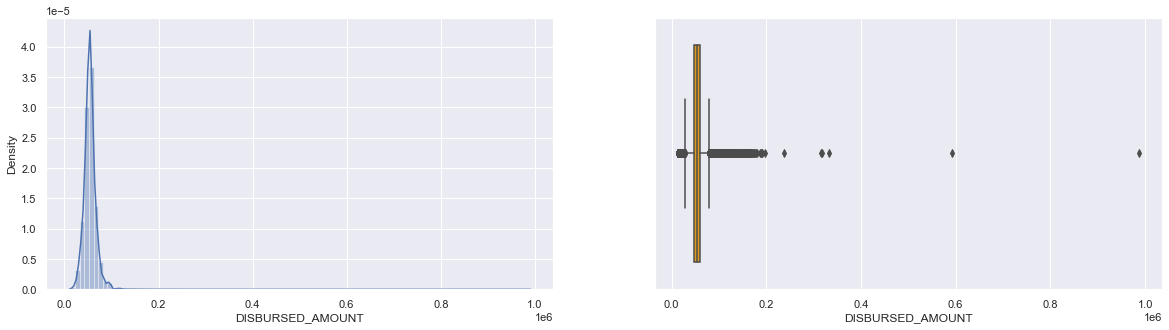

In [22]:
plot('DISBURSED_AMOUNT')

In [23]:
# OUTLIER TREATMENT

#Before Outlier elimintation
print('Before Outlier elimintation\n')
outlier_data(new_data,'DISBURSED_AMOUNT')

obs = len(new_data['DISBURSED_AMOUNT'])
data_mean, data_std, data_median = mean(new_data['DISBURSED_AMOUNT']), std(new_data['DISBURSED_AMOUNT']), median(new_data['DISBURSED_AMOUNT'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

#After Outlier elimintation
print('\n\nAfter Outlier elimintation\n')
new_data["DISBURSED_AMOUNT_new"]= new_data['DISBURSED_AMOUNT'].apply(impute_outlier_median)
outlier_data(new_data,'DISBURSED_AMOUNT_new')

Before Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 54240.729, Std dev = 12775.562, Median = 53703.000
Identified outliers: 3036


After Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 53613.619, Std dev = 11097.196, Median = 53703.000
Identified outliers: 1538


2. 'ASSET_COST'

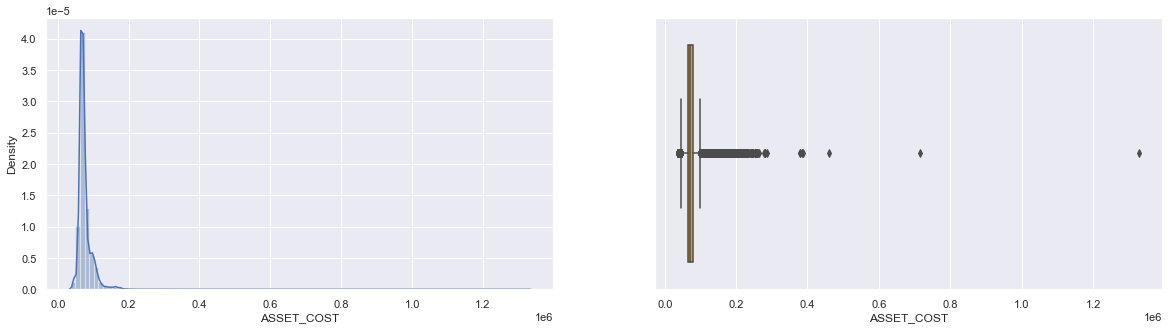

In [24]:
plot('ASSET_COST')

In [25]:
# OUTLIER TREATMENT

#Before Outlier elimintation
print('Before Outlier elimintation\n')
outlier_data(new_data,'ASSET_COST')

obs = len(new_data['ASSET_COST'])
data_mean, data_std, data_median = mean(new_data['ASSET_COST']), std(new_data['ASSET_COST']), median(new_data['ASSET_COST'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

#After Outlier elimintation
print('\n\nAfter Outlier elimintation\n')
new_data["ASSET_COST_new"]= new_data['ASSET_COST'].apply(impute_outlier_median)
outlier_data(new_data,'ASSET_COST_new')

Before Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 75631.132, Std dev = 18527.535, Median = 70807.000
Identified outliers: 4391


After Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 73926.293, Std dev = 13836.326, Median = 70807.000
Identified outliers: 3338


3. 'LTV'

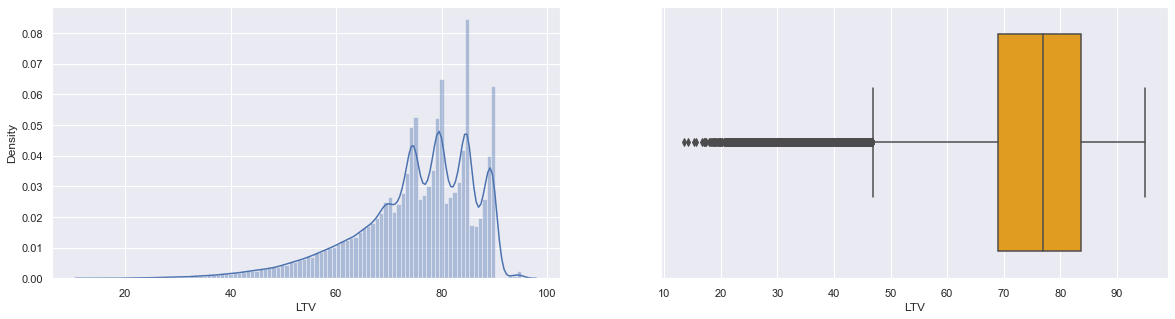

In [26]:
plot('LTV')

In [27]:
# OUTLIER TREATMENT

#Before Outlier elimintation
print('Before Outlier elimintation\n')
outlier_data(new_data,'LTV')

obs = len(new_data['LTV'])
data_mean, data_std, data_median = mean(new_data['LTV']), std(new_data['LTV']), median(new_data['LTV'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

#After Outlier elimintation
print('\n\nAfter Outlier elimintation\n')
new_data["LTV_new"]= new_data['LTV'].apply(impute_outlier_median)
outlier_data(new_data,'LTV_new')

Before Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 74.807, Std dev = 11.442, Median = 76.890
Identified outliers: 2645


After Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 75.305, Std dev = 10.548, Median = 76.890
Identified outliers: 1402


4. 'PERFORM_CNS_SCORE'

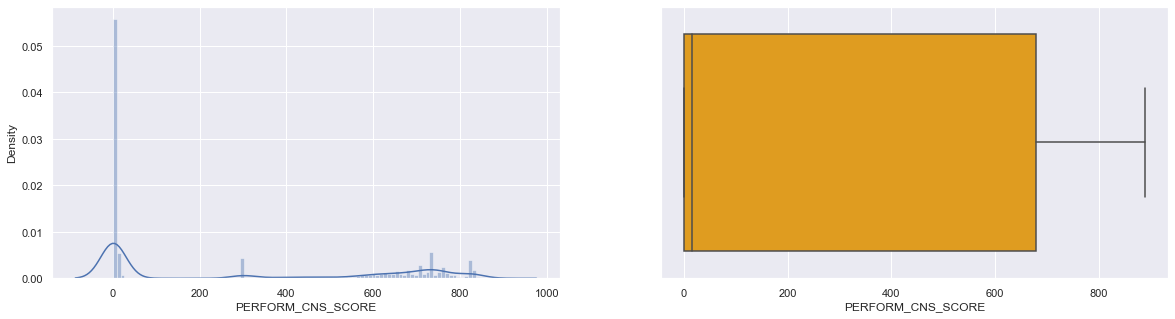

In [28]:
plot('PERFORM_CNS_SCORE')

In [29]:
# No Outliers Found

# Since we have PERFORM_CNS_SCORE_Description
# We are going to use binning method to categories the varible

# Bin Label
bin_labels = ["No History",'Very High Risk', "High Risk" ,'Medium Risk', 'Low Risk']
# Bin range
cut_bins = [-1,10,150, 350, 650, 1000]


new_data['PERFORM_CNS_SCORE_bins'] = pd.cut(new_data['PERFORM_CNS_SCORE'],
                              bins=cut_bins,
                              labels=bin_labels)
new_data['PERFORM_CNS_SCORE_bins'].value_counts()

No History        111773
Low Risk           63675
Medium Risk        27811
Very High Risk     12480
High Risk           9754
Name: PERFORM_CNS_SCORE_bins, dtype: int64

In [30]:
# Compare the created bins with the 'PERFORM_CNS_SCORE_Description'

new_data.groupby(["PERFORM_CNS_SCORE_DESCRIPTION"]).PERFORM_CNS_SCORE_bins.value_counts()

PERFORM_CNS_SCORE_DESCRIPTION                            PERFORM_CNS_SCORE_bins
A-Very Low Risk                                          Low Risk                   13790
B-Very Low Risk                                          Low Risk                    9032
C-Very Low Risk                                          Low Risk                   15715
D-Very Low Risk                                          Low Risk                   11134
E-Low Risk                                               Low Risk                    5695
F-Low Risk                                               Low Risk                    8309
G-Low Risk                                               Medium Risk                 3902
H-Medium Risk                                            Medium Risk                 6695
I-Medium Risk                                            Medium Risk                 5440
J-High Risk                                              Medium Risk                 3667
K-High Risk         

<Figure size 720x3600 with 0 Axes>

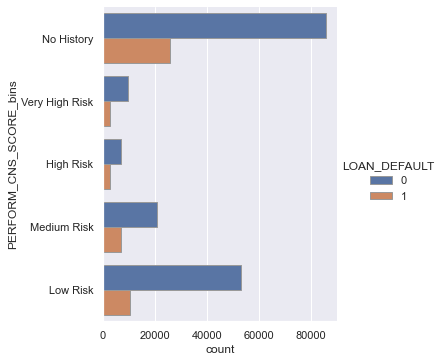

In [31]:
def plot_bar(feature):
    plt.figure(figsize=(10,50))
    sns.catplot(y=feature, hue="LOAN_DEFAULT", kind="count",
            edgecolor=".6",
            data=new_data);

plot_bar('PERFORM_CNS_SCORE_bins')

5. 'NEW_ACCTS_IN_LAST_SIX_MONTHS'

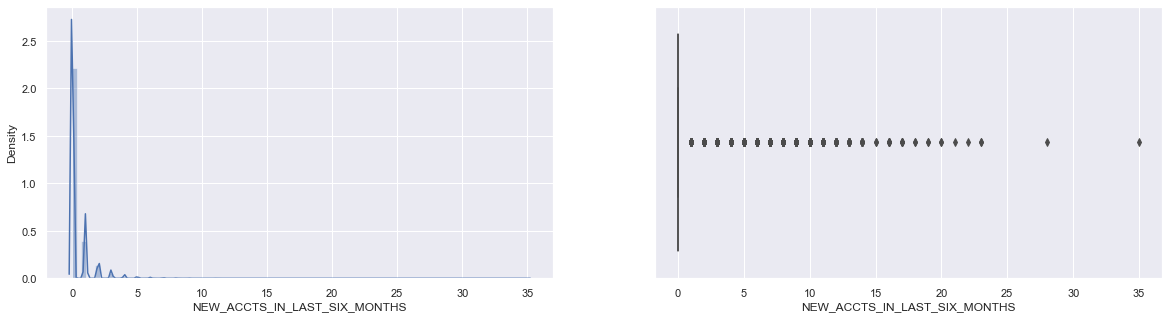

In [32]:
plot('NEW_ACCTS_IN_LAST_SIX_MONTHS')

In [33]:
# OUTLIER TREATMENT

#Before Outlier elimintation
print('Before Outlier elimintation\n')
outlier_data(new_data,'NEW_ACCTS_IN_LAST_SIX_MONTHS')

obs = len(new_data['NEW_ACCTS_IN_LAST_SIX_MONTHS'])
data_mean, data_std, data_median = mean(new_data['NEW_ACCTS_IN_LAST_SIX_MONTHS']), std(new_data['NEW_ACCTS_IN_LAST_SIX_MONTHS']), median(new_data['NEW_ACCTS_IN_LAST_SIX_MONTHS'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

#After Outlier elimintation
print('\n\nAfter Outlier elimintation\n')
new_data["NEW_ACCTS_IN_LAST_SIX_MONTHS_new"]= new_data['NEW_ACCTS_IN_LAST_SIX_MONTHS'].apply(impute_outlier_median)
outlier_data(new_data,'NEW_ACCTS_IN_LAST_SIX_MONTHS_new')

Before Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 0.387, Std dev = 0.960, Median = 0.000
Identified outliers: 4007


After Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 0.293, Std dev = 0.648, Median = 0.000
Identified outliers: 4375


<Figure size 720x3600 with 0 Axes>

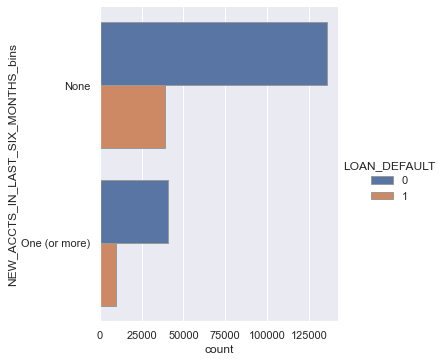

In [34]:
# create bins

bin_labels = ["None",'One (or more)']
cut_bins = [-1,0, 1000]

new_data['NEW_ACCTS_IN_LAST_SIX_MONTHS_bins'] = pd.cut(new_data['NEW_ACCTS_IN_LAST_SIX_MONTHS'],
                              bins=cut_bins,
                              labels=bin_labels)
new_data['NEW_ACCTS_IN_LAST_SIX_MONTHS_bins'].value_counts()

plot_bar("NEW_ACCTS_IN_LAST_SIX_MONTHS_bins")

6. 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'

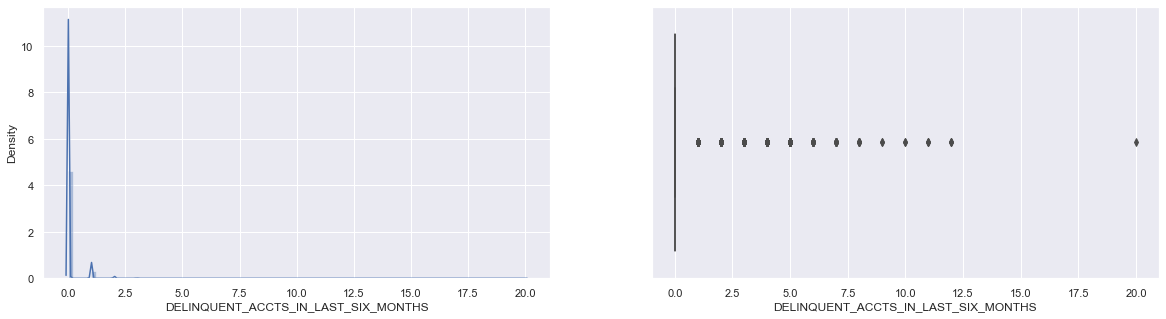

In [35]:
plot('DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS')

In [36]:
# OUTLIER TREATMENT

#Before Outlier elimintation
print('Before Outlier elimintation\n')
outlier_data(new_data,'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS')

obs = len(new_data['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'])
data_mean, data_std, data_median = mean(new_data['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS']), std(new_data['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS']), median(new_data['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

#After Outlier elimintation
print('\n\nAfter Outlier elimintation\n')
new_data["DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_new"]= new_data['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'].apply(impute_outlier_mean)
outlier_data(new_data,'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_new')

Before Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 0.099, Std dev = 0.386, Median = 0.000
Identified outliers: 3166


After Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 0.066, Std dev = 0.247, Median = 0.000
Identified outliers: 14680


<Figure size 720x3600 with 0 Axes>

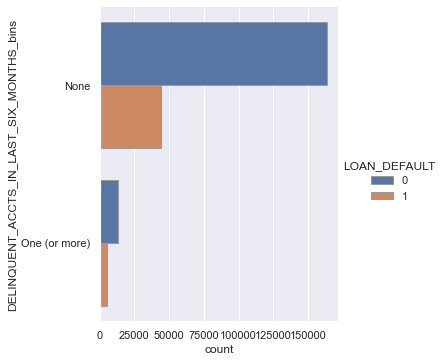

In [37]:
# create bins

bin_labels = ["None",'One (or more)']
cut_bins = [-1,0, 1000]

new_data['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_bins'] = pd.cut(new_data['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'],
                              bins=cut_bins,
                              labels=bin_labels)
new_data['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_bins'].value_counts()

plot_bar("DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_bins")

7. 'AVERAGE_ACCT_AGE'

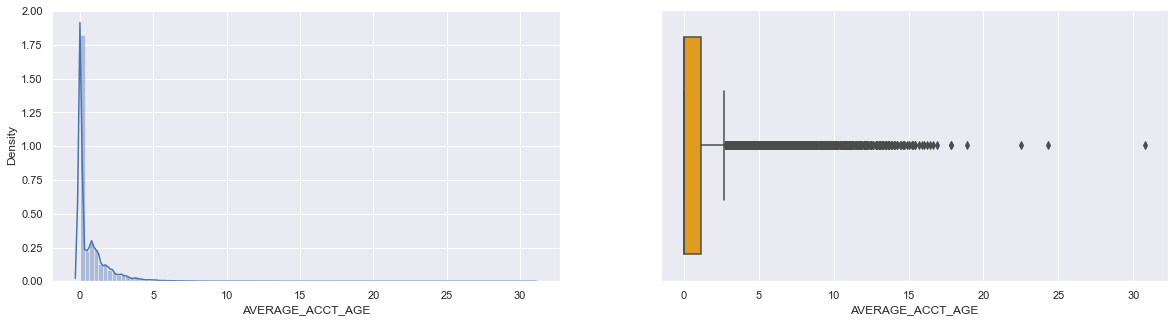

In [38]:
plot('AVERAGE_ACCT_AGE')

In [39]:
# OUTLIER TREATMENT

#Before Outlier elimintation
print('Before Outlier elimintation\n')
outlier_data(new_data,'AVERAGE_ACCT_AGE')

obs = len(new_data['AVERAGE_ACCT_AGE'])
data_mean, data_std, data_median = mean(new_data['AVERAGE_ACCT_AGE']), std(new_data['AVERAGE_ACCT_AGE']), median(new_data['AVERAGE_ACCT_AGE'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

#After Outlier elimintation
print('\n\nAfter Outlier elimintation\n')
new_data["AVERAGE_ACCT_AGE_new"]= new_data['AVERAGE_ACCT_AGE'].apply(impute_outlier_median)
outlier_data(new_data,'AVERAGE_ACCT_AGE_new')

Before Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 0.752, Std dev = 1.264, Median = 0.000
Identified outliers: 4541


After Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 0.623, Std dev = 0.928, Median = 0.000
Identified outliers: 4553


8. 'CREDIT_HISTORY_LENGTH'

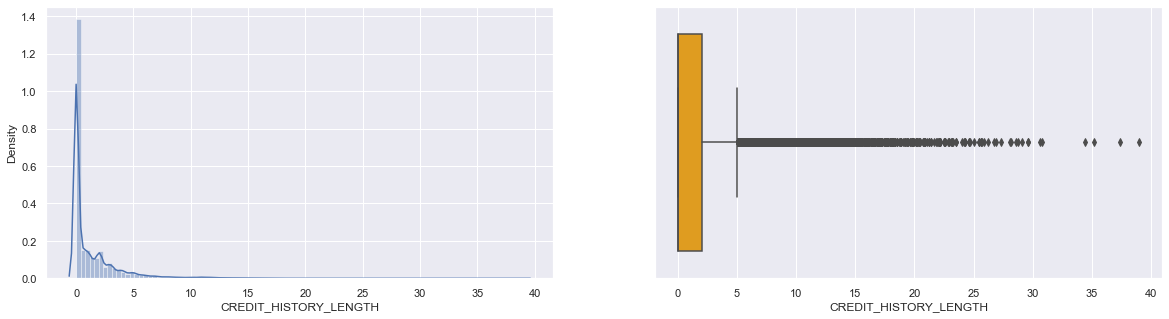

In [40]:
plot('CREDIT_HISTORY_LENGTH')

In [41]:
# OUTLIER TREATMENT

#Before Outlier elimintation
print('Before Outlier elimintation\n')
outlier_data(new_data,'CREDIT_HISTORY_LENGTH')

obs = len(new_data['CREDIT_HISTORY_LENGTH'])
data_mean, data_std, data_median = mean(new_data['CREDIT_HISTORY_LENGTH']), std(new_data['CREDIT_HISTORY_LENGTH']), median(new_data['CREDIT_HISTORY_LENGTH'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

#After Outlier elimintation
print('\n\nAfter Outlier elimintation\n')
new_data["CREDIT_HISTORY_LENGTH_new"]= new_data['CREDIT_HISTORY_LENGTH'].apply(impute_outlier_median)
outlier_data(new_data,'CREDIT_HISTORY_LENGTH_new')

Before Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 1.372, Std dev = 2.390, Median = 0.000
Identified outliers: 5820


After Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 1.073, Std dev = 1.677, Median = 0.000
Identified outliers: 5067


9. 'NO_OF_INQUIRIES'

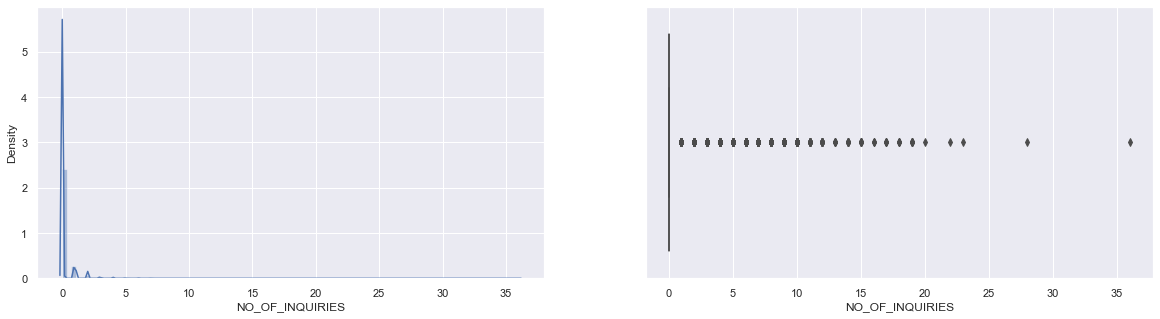

In [42]:
plot('NO_OF_INQUIRIES')

In [43]:
# OUTLIER TREATMENT

#Before Outlier elimintation
print('Before Outlier elimintation\n')
outlier_data(new_data,'NO_OF_INQUIRIES')

obs = len(new_data['NO_OF_INQUIRIES'])
data_mean, data_std, data_median = mean(new_data['NO_OF_INQUIRIES']), std(new_data['NO_OF_INQUIRIES']), median(new_data['NO_OF_INQUIRIES'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

#After Outlier elimintation
print('\n\nAfter Outlier elimintation\n')
new_data["NO_OF_INQUIRIES_new"]= new_data['NO_OF_INQUIRIES'].apply(impute_outlier_median)
outlier_data(new_data,'NO_OF_INQUIRIES_new')

Before Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 0.209, Std dev = 0.710, Median = 0.000
Identified outliers: 3415


After Outlier elimintation

No. of observations in column:  225493
Statistics: Mean = 0.144, Std dev = 0.412, Median = 0.000
Identified outliers: 5294


<Figure size 720x3600 with 0 Axes>

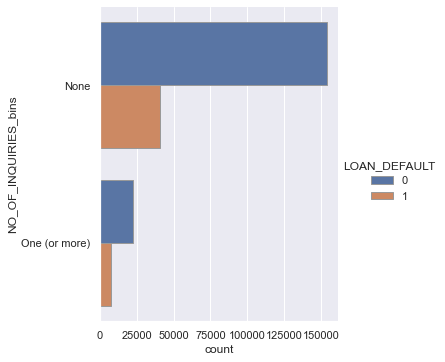

In [44]:
# create bins

bin_labels = ["None",'One (or more)']
cut_bins = [-1,0, 1000]

new_data['NO_OF_INQUIRIES_bins'] = pd.cut(new_data['NO_OF_INQUIRIES'],
                              bins=cut_bins,
                              labels=bin_labels)
new_data['NO_OF_INQUIRIES_bins'].value_counts()

plot_bar("NO_OF_INQUIRIES_bins")

10. 'CUSTOMER_AGE'

<AxesSubplot:xlabel='CUSTOMER_AGE'>

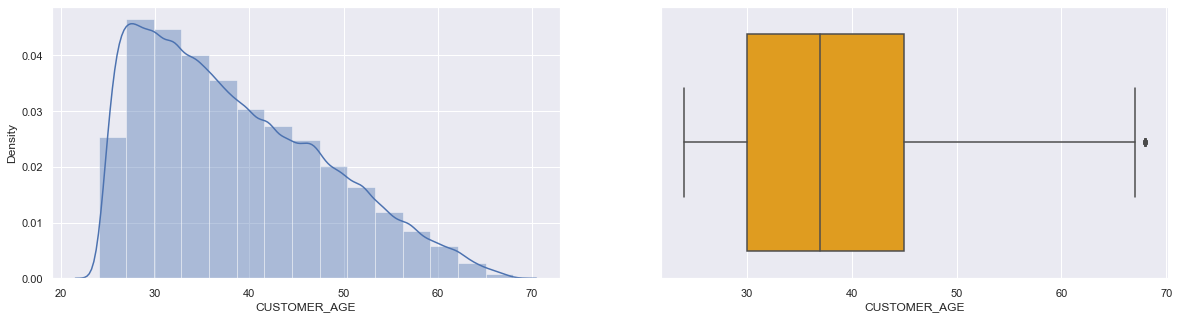

In [45]:
# Plot the grapg
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(new_data['CUSTOMER_AGE'],bins=15)
    
plt.subplot(1,2,2)
sns.boxplot(new_data['CUSTOMER_AGE'],color='orange')

#### Secondary Variables

Since most of the variables are values in all the secondary variables are similar. We are going to create a distribution plot to visually understand the features

In [46]:
Primary = new_data[['PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 
                    'PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT']]
Secondary = new_data[['SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 
                      'SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT','SEC_INSTAL_AMT']]

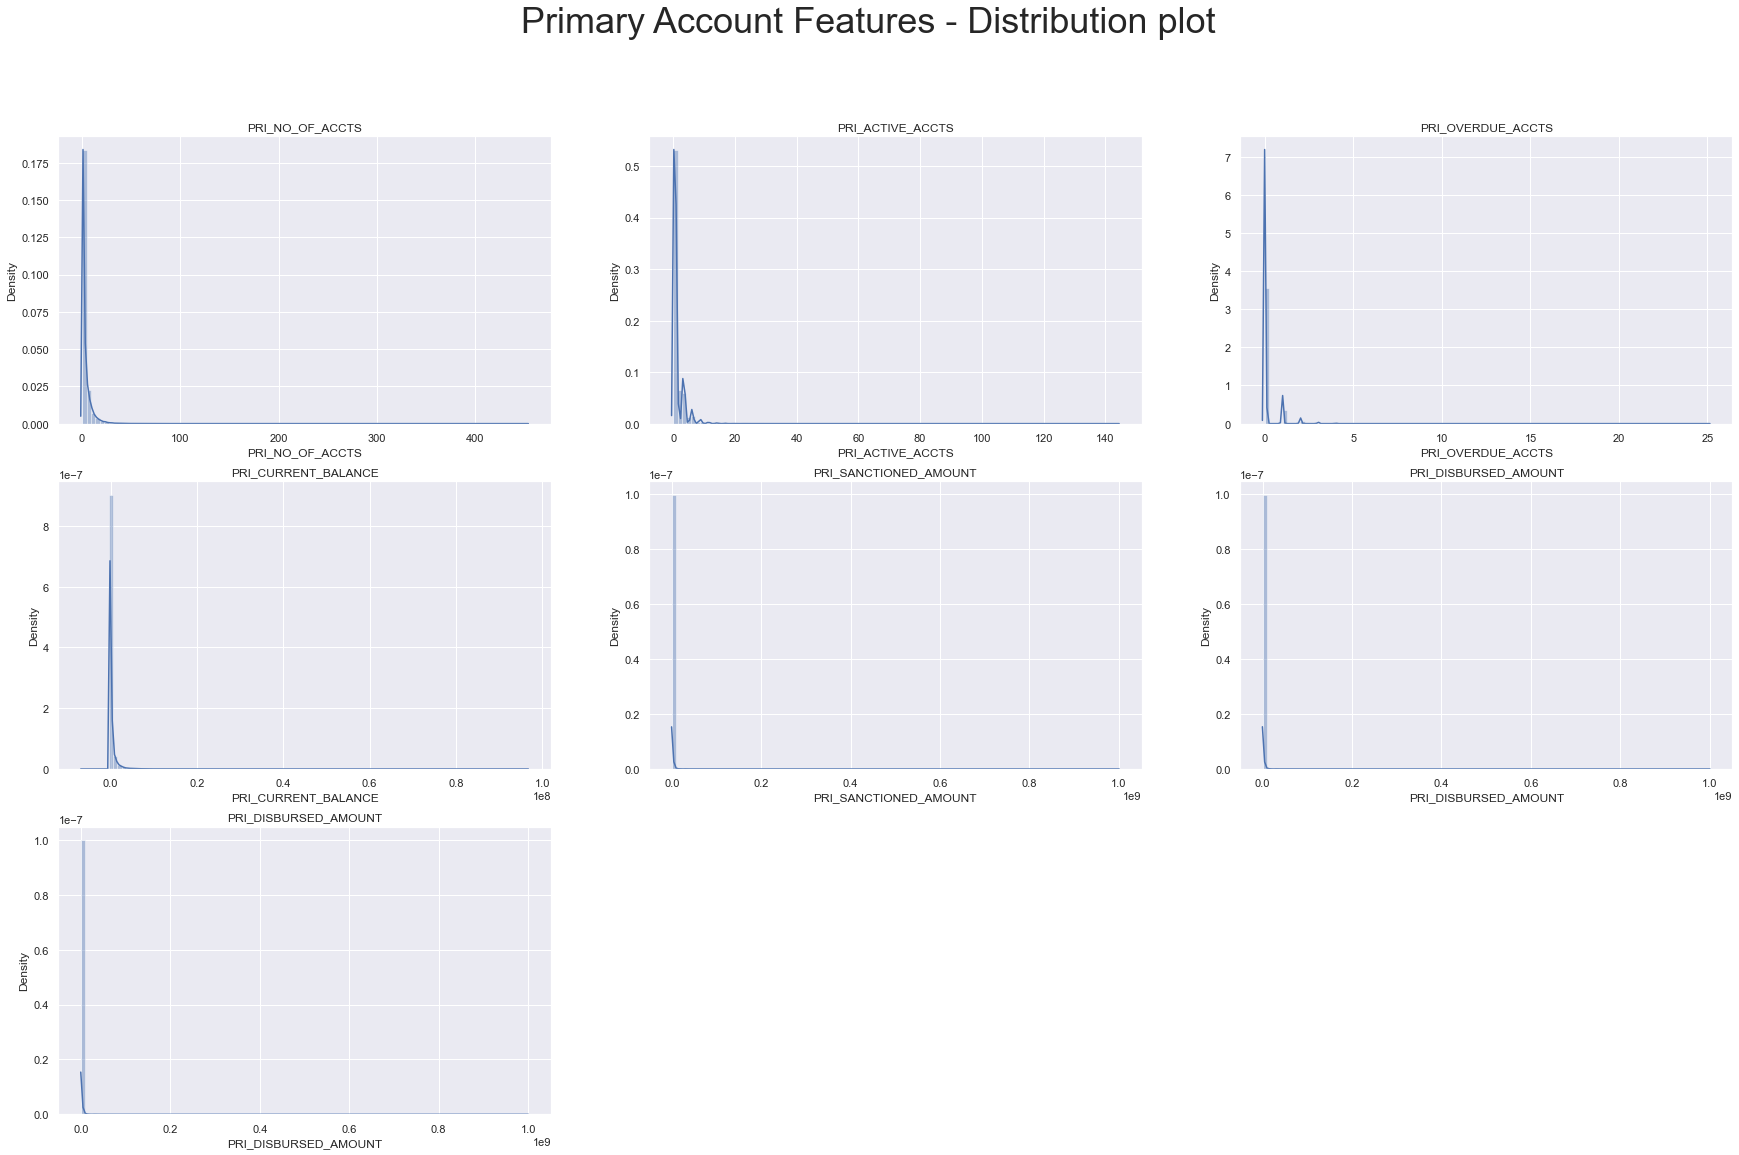

In [47]:
# Create distribution plot for Primary

plt.figure(figsize = (30,18))
plt.rc('font', size=30)
plt.suptitle('Primary Account Features - Distribution plot')

plt.subplot(3,3,1)
sns.distplot(Primary['PRI_NO_OF_ACCTS'],bins=100)
plt.title('PRI_NO_OF_ACCTS')

plt.subplot(3,3,2)
sns.distplot(Primary['PRI_ACTIVE_ACCTS'],bins=100)
plt.title('PRI_ACTIVE_ACCTS')

plt.subplot(3,3,3)
sns.distplot(Primary['PRI_OVERDUE_ACCTS'],bins=100)
plt.title('PRI_OVERDUE_ACCTS')

plt.subplot(3,3,4)
sns.distplot(Primary['PRI_CURRENT_BALANCE'],bins=100)
plt.title('PRI_CURRENT_BALANCE')

plt.subplot(3,3,5)
sns.distplot(Primary['PRI_SANCTIONED_AMOUNT'],bins=100)
plt.title('PRI_SANCTIONED_AMOUNT')

plt.subplot(3,3,6)
sns.distplot(Primary['PRI_DISBURSED_AMOUNT'],bins=100)
plt.title('PRI_DISBURSED_AMOUNT')

plt.subplot(3,3,7)
sns.distplot(Primary['PRI_DISBURSED_AMOUNT'],bins=100)
plt.title('PRI_DISBURSED_AMOUNT')

plt.show()

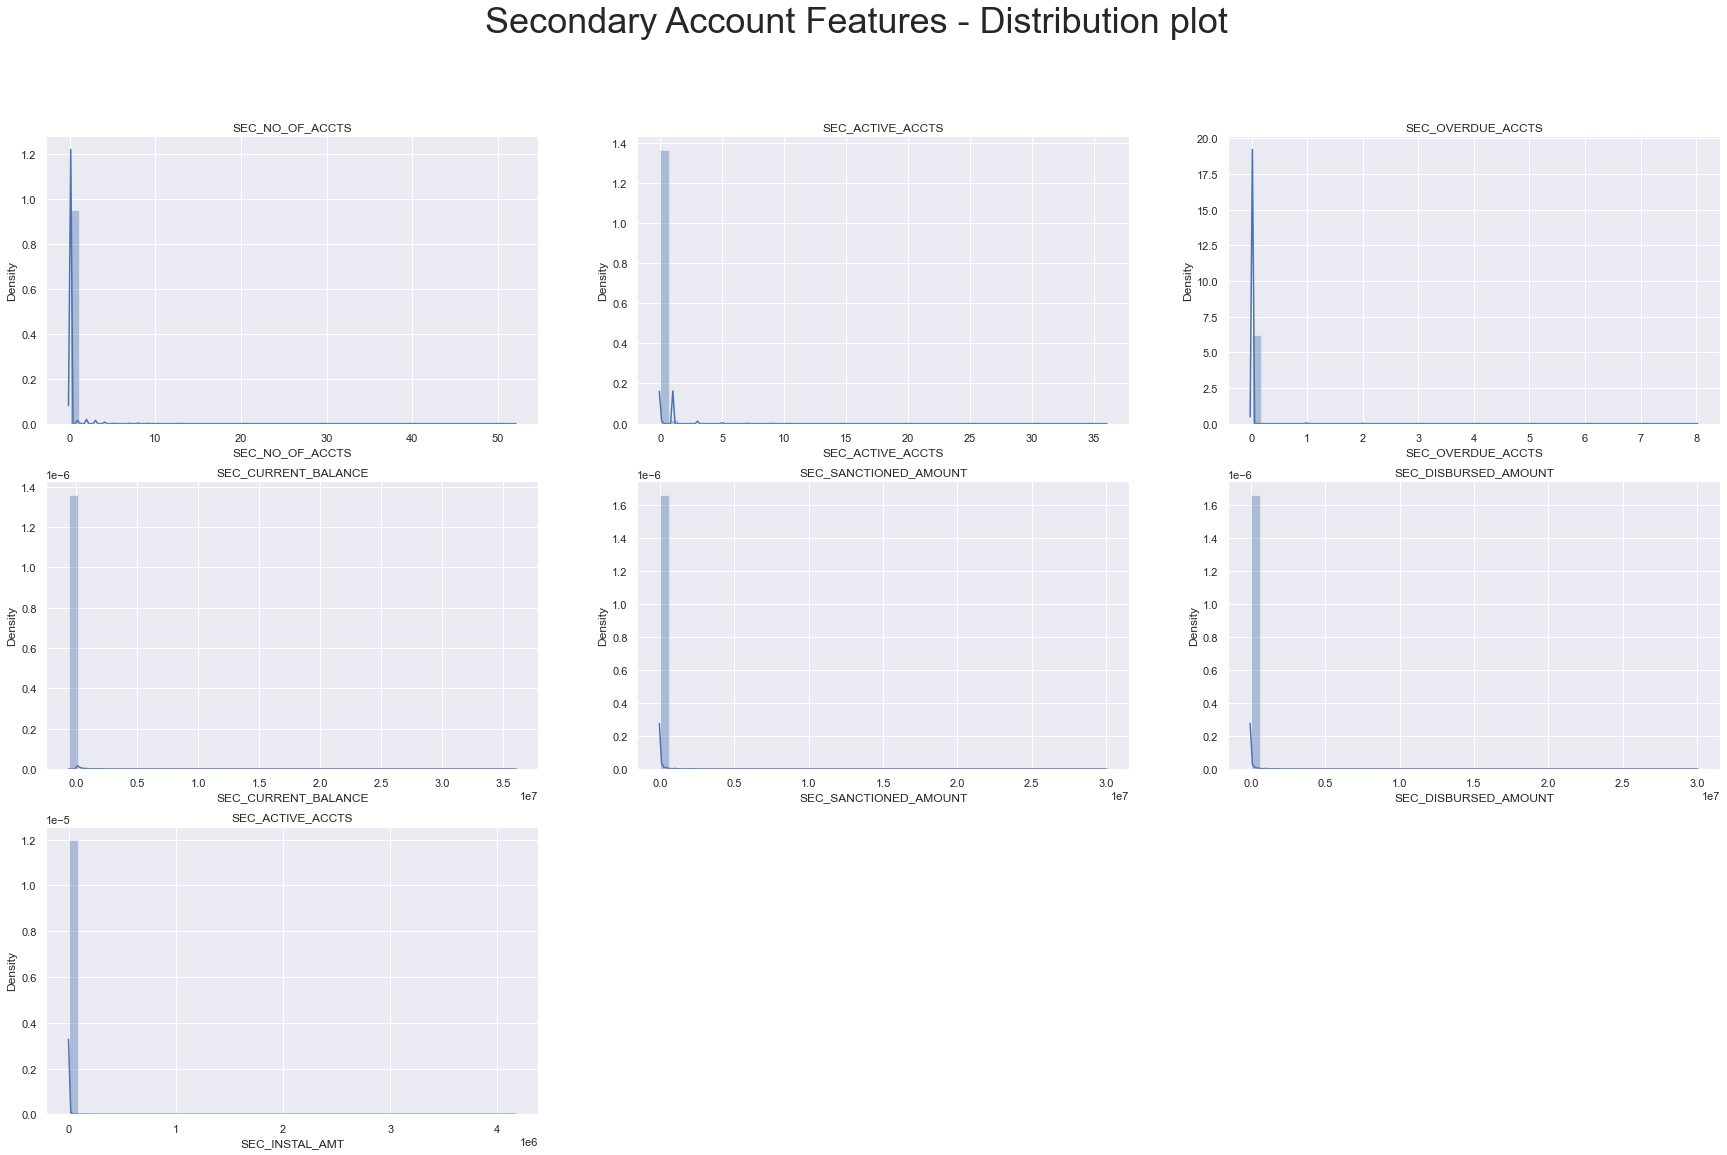

In [48]:
# Create distribution plot for Secondary

plt.figure(figsize = (30,18))
plt.rc('font', size=30)
plt.suptitle('Secondary Account Features - Distribution plot')

plt.subplot(3,3,1)
sns.distplot(Secondary['SEC_NO_OF_ACCTS'])
plt.title('SEC_NO_OF_ACCTS')

plt.subplot(3,3,2)
sns.distplot(Secondary['SEC_ACTIVE_ACCTS'])
plt.title('SEC_ACTIVE_ACCTS')

plt.subplot(3,3,3)
sns.distplot(Secondary['SEC_OVERDUE_ACCTS'])
plt.title('SEC_OVERDUE_ACCTS')

plt.subplot(3,3,4)
sns.distplot(Secondary['SEC_CURRENT_BALANCE'])
plt.title('SEC_CURRENT_BALANCE')

plt.subplot(3,3,5)
sns.distplot(Secondary['SEC_SANCTIONED_AMOUNT'])
plt.title('SEC_SANCTIONED_AMOUNT')

plt.subplot(3,3,6)
sns.distplot(Secondary['SEC_DISBURSED_AMOUNT'])
plt.title('SEC_DISBURSED_AMOUNT')

plt.subplot(3,3,7)
sns.distplot(Secondary['SEC_INSTAL_AMT'])
plt.title('SEC_ACTIVE_ACCTS')

plt.show()

#### Observation:
As we seen in the distribution plot mostly all the features are having values in 0 or more.


#### Categorical Variables

In [49]:
var = new_data[['MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'PASSPORT_FLAG', 'DRIVING_FLAG']]

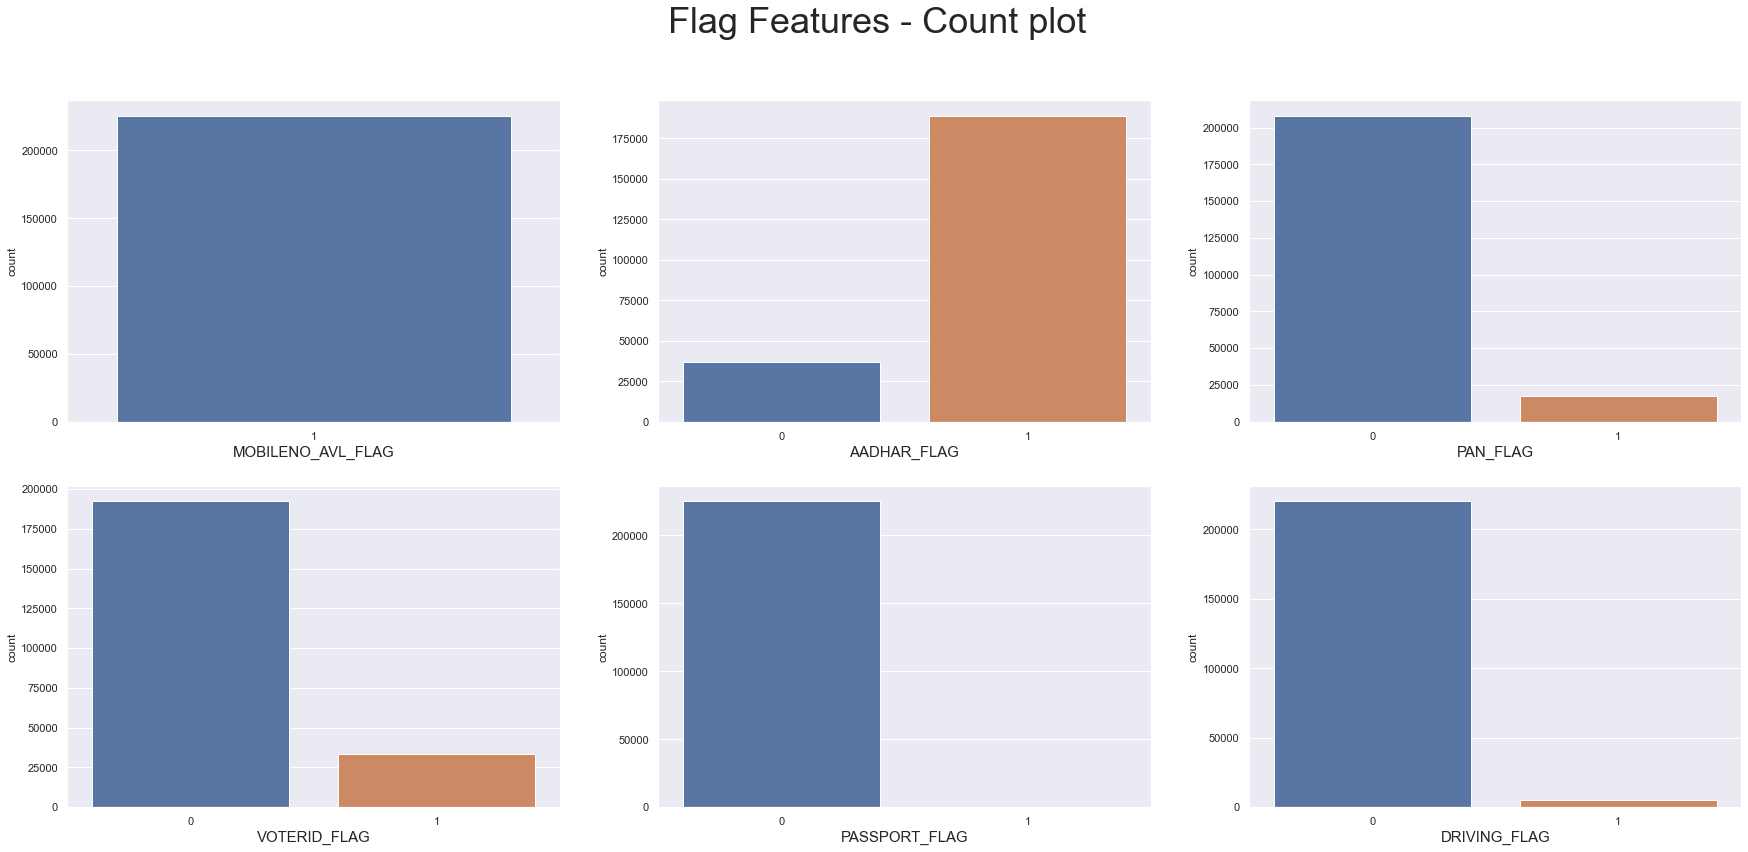

In [50]:
# Create Countplot 

plt.figure(figsize = (30,13))
plt.rc('font', size=30)
plt.suptitle('Flag Features - Count plot')

plt.subplot(2,3,1)
sns.countplot(var['MOBILENO_AVL_FLAG'])
plt.xlabel('MOBILENO_AVL_FLAG',size=15)

plt.subplot(2,3,2)
sns.countplot(var['AADHAR_FLAG'])
plt.xlabel('AADHAR_FLAG',size=15)

plt.subplot(2,3,3)
sns.countplot(var['PAN_FLAG'])
plt.xlabel('PAN_FLAG',size=15)

plt.subplot(2,3,4)
sns.countplot(var['VOTERID_FLAG'])
plt.xlabel('VOTERID_FLAG',size=15)

plt.subplot(2,3,5)
sns.countplot(var['PASSPORT_FLAG'])
plt.xlabel('PASSPORT_FLAG',size=15)

plt.subplot(2,3,6)
sns.countplot(var['DRIVING_FLAG'])
plt.xlabel('DRIVING_FLAG',size=15)

plt.show()

#### Observation:
The Flag features are already in binary classification which can be directly used for modelling.

<AxesSubplot:xlabel='PERFORM_CNS_SCORE_bins', ylabel='count'>

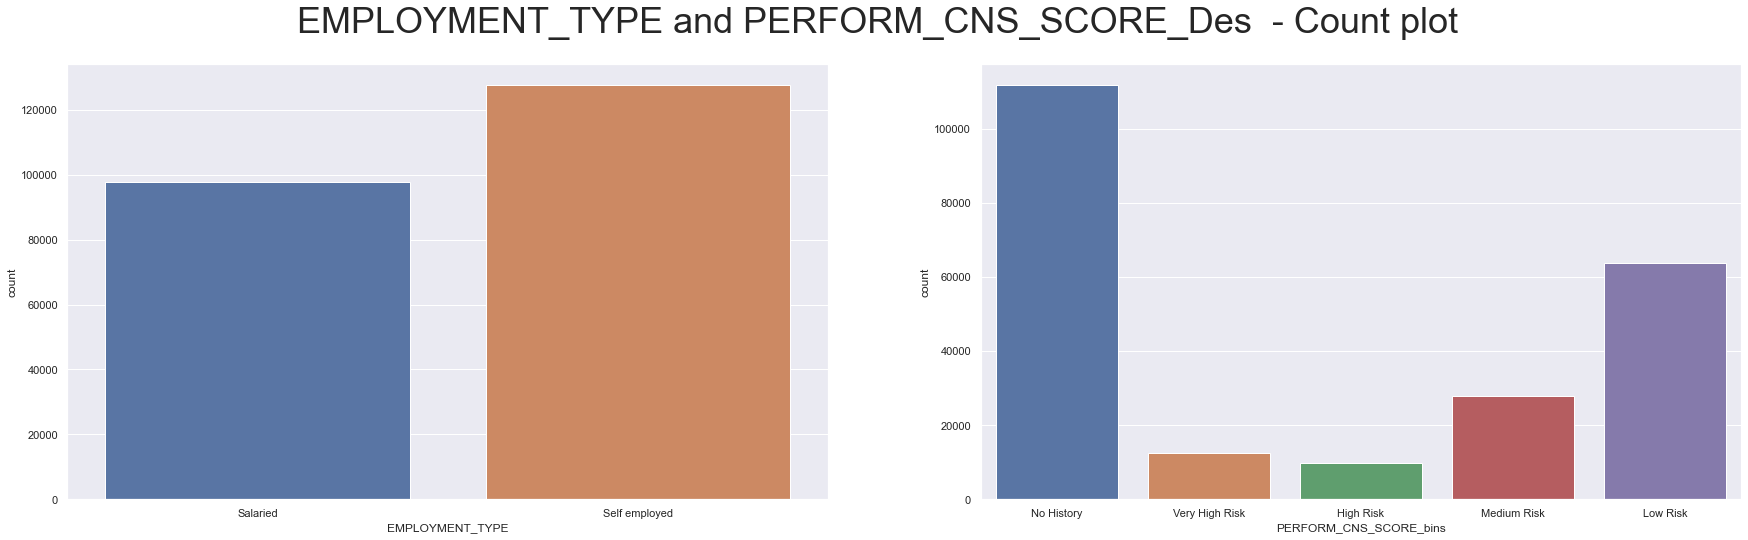

In [51]:
plt.figure(figsize = (30,8))
plt.rc('font', size=30)
plt.suptitle('EMPLOYMENT_TYPE and PERFORM_CNS_SCORE_Des  - Count plot')

plt.subplot(1,2,1)
sns.countplot(new_data['EMPLOYMENT_TYPE'])

plt.subplot(1,2,2)
sns.countplot(new_data['PERFORM_CNS_SCORE_bins'])

## 5. Feature Selection
### Drop unnecessary variables

In [52]:
new_data.shape

(225493, 45)

In [53]:
new_data.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'EMPLOYMENT_TYPE',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'CUSTOMER_AGE', 'DISBURSED_AMOUNT_new',
       'ASSET_COST_new', 'LTV_new', 'PERFORM_CNS_SCORE_bins',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS_new', 'NEW_ACCTS_IN_LAST_SIX_MONTHS_bins',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_new',
       'DELINQUENT_ACCTS_

In [54]:
new_data = new_data.drop(columns = ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV','PERFORM_CNS_SCORE','NEW_ACCTS_IN_LAST_SIX_MONTHS'
                                   ,'NEW_ACCTS_IN_LAST_SIX_MONTHS_new','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
                                   'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_new','AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH',
                                   'NO_OF_INQUIRIES','NO_OF_INQUIRIES_new','PERFORM_CNS_SCORE_DESCRIPTION'])

In [55]:
new_data.shape

(225493, 32)

### Correlation Matrix

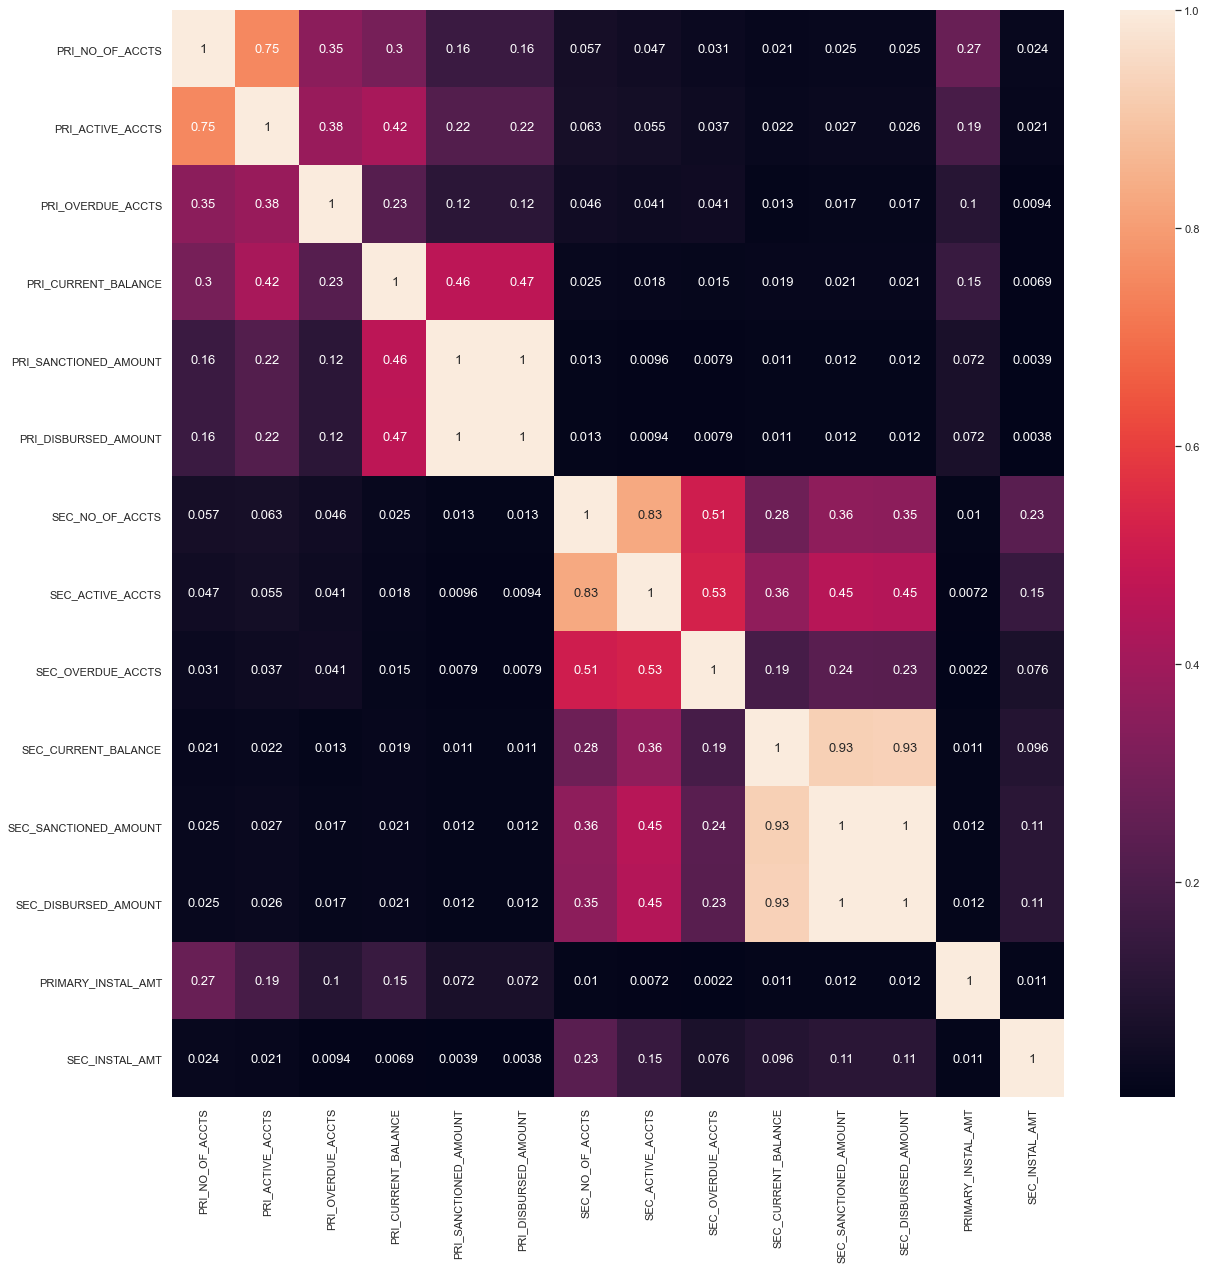

In [56]:
# Check correlation for all the primaty and secondary account 

Account = new_data[['PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
                    'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
                    'SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT']]

plt.figure(figsize=(20,20))
plt.rc('font', size=13)
ax = sns.heatmap(Account.corr(), annot=True)
plt.show()

#### Observation: 
1. PRI_NO_OF_ACCTS and PRI_ACTIVE_ACCTS are highly correlated and hence gonna keep only one 'PRI_NO_OF_ACCTS'
2. SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT and SEC_DISBURSED_AMOUNT are highly correlated. So only keeping 'SEC_SANCTIONED_AMOUNT'

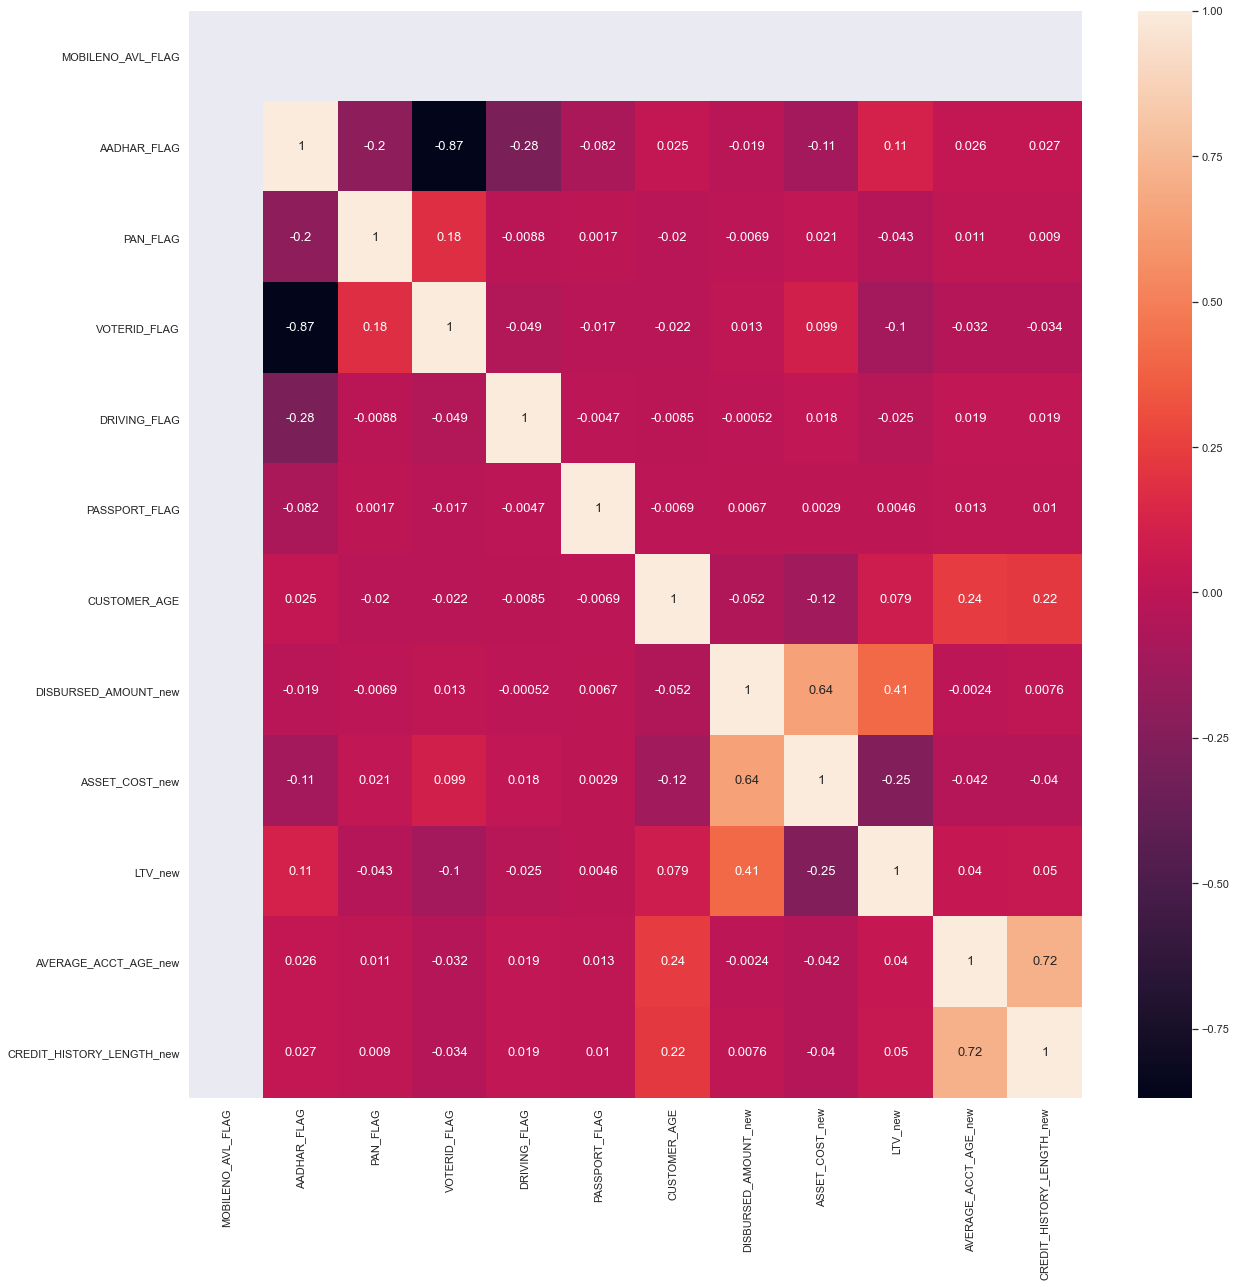

In [57]:
# Check correlation for rest of the features
Cols = new_data[['EMPLOYMENT_TYPE', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG','VOTERID_FLAG','DRIVING_FLAG', 
                 'PASSPORT_FLAG','CUSTOMER_AGE','DISBURSED_AMOUNT_new', 'ASSET_COST_new', 'LTV_new',
                 'PERFORM_CNS_SCORE_bins', 'NEW_ACCTS_IN_LAST_SIX_MONTHS_bins','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_bins',
                 'AVERAGE_ACCT_AGE_new','CREDIT_HISTORY_LENGTH_new', 'NO_OF_INQUIRIES_bins']]

plt.figure(figsize=(20,20))
plt.rc('font', size=13)
ax = sns.heatmap(Cols.corr(), annot=True)
plt.show()

#### Observation: 
1. AVERAGE_ACCT_AGE_new and CREDIT_HISTORY_LENGTH_new are highly correlated and hence gonna keep only one 'CREDIT_HISTORY_LENGTH_new'

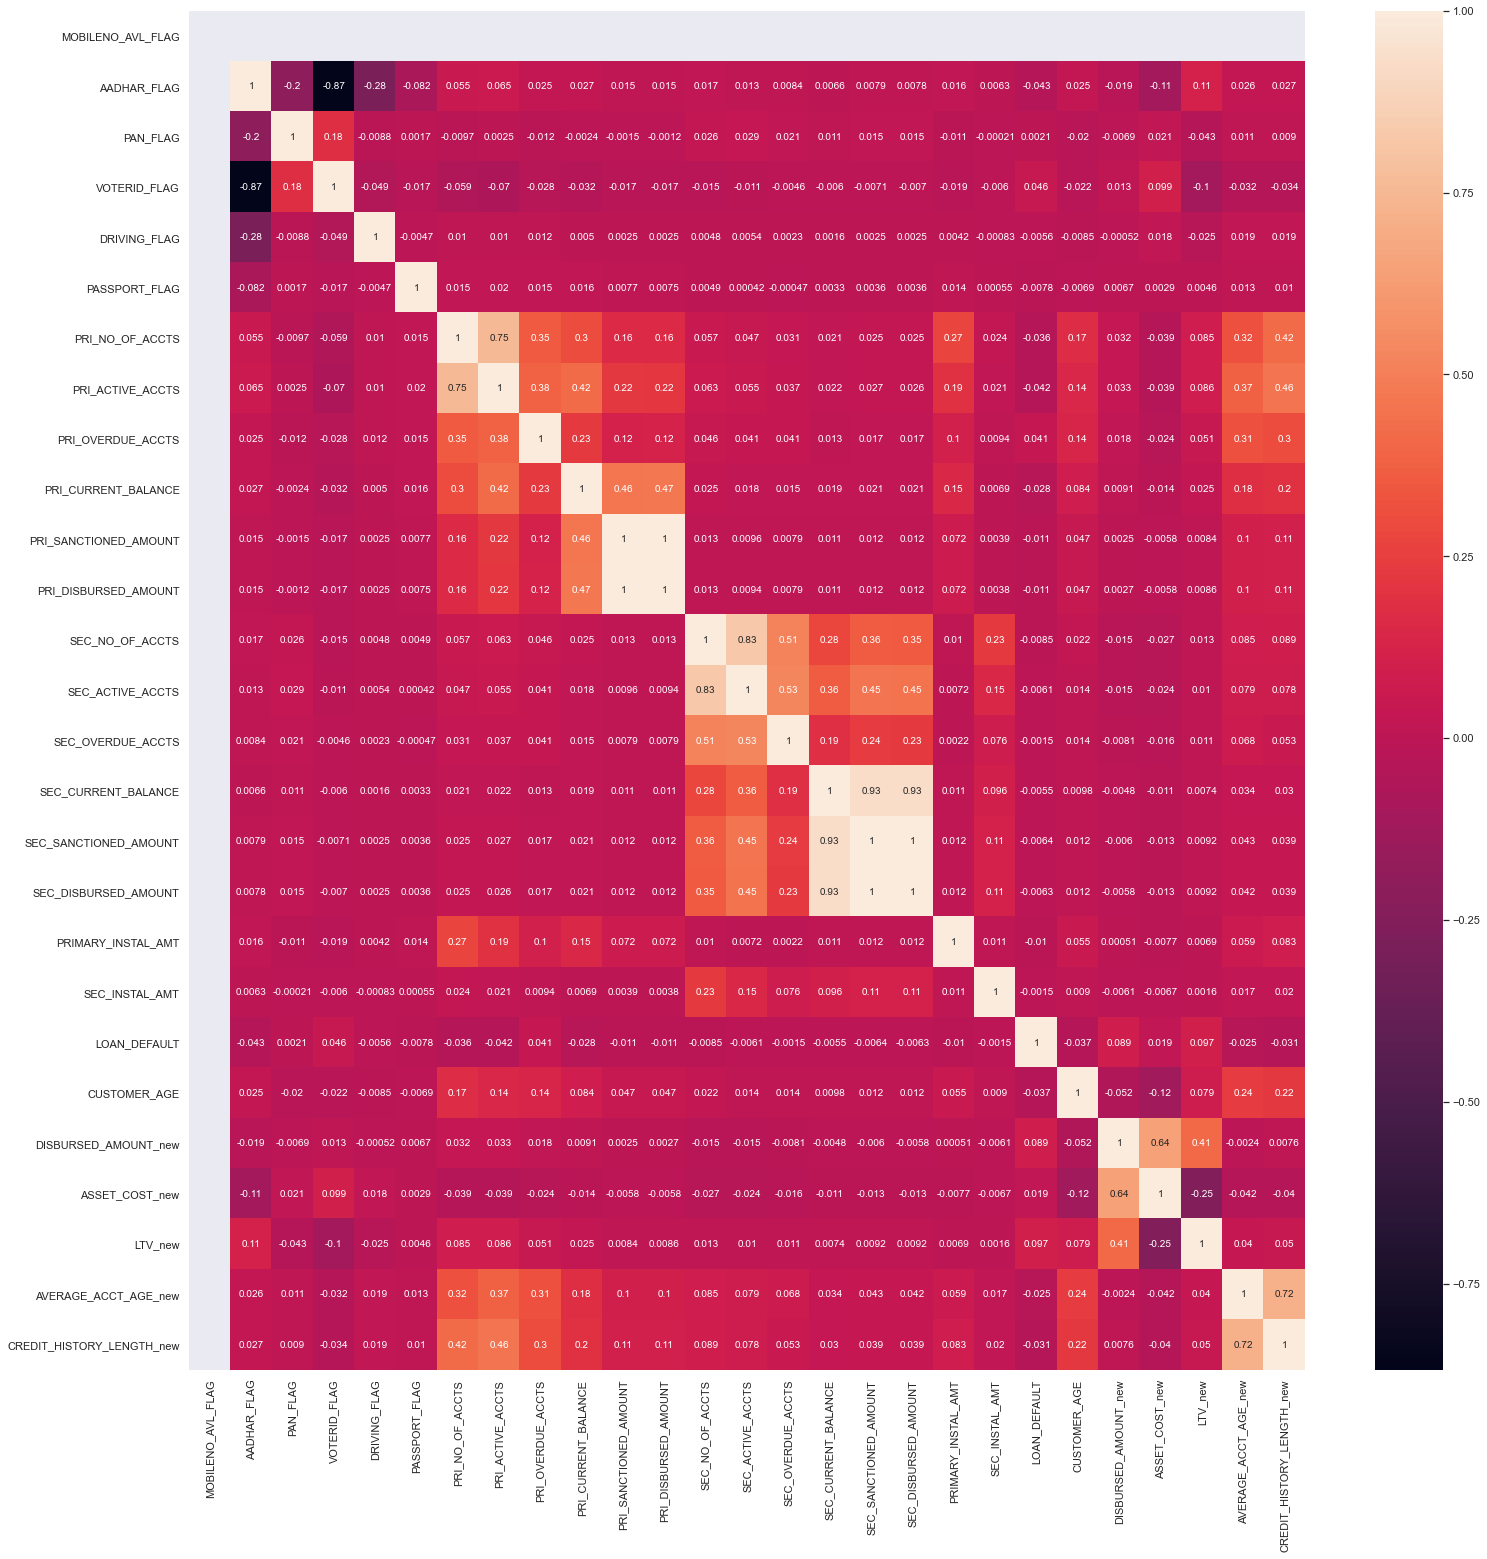

In [58]:
# Correlate all the features as final check
plt.figure(figsize=(25,25))
plt.rc('font', size=10)
ax = sns.heatmap(new_data.corr(), annot=True)
plt.show()

#### Observation: 
1. 'PRI_ACTIVE_ACCTS','SEC_ACTIVE_ACCTS','SEC_CURRENT_BALANCE','SEC_DISBURSED_AMOUNT','PRI_DISBURSED_AMOUNT',
   'AVERAGE_ACCT_AGE_new' are going to be eliminted.

In [59]:
new_data = new_data.drop(columns = ['PRI_ACTIVE_ACCTS','SEC_ACTIVE_ACCTS','SEC_CURRENT_BALANCE','SEC_DISBURSED_AMOUNT',
                                    'PRI_DISBURSED_AMOUNT','AVERAGE_ACCT_AGE_new'])

In [60]:
new_data.shape

(225493, 26)

In [61]:
new_data.columns

Index(['EMPLOYMENT_TYPE', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PRI_NO_OF_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_SANCTIONED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'LOAN_DEFAULT', 'CUSTOMER_AGE',
       'DISBURSED_AMOUNT_new', 'ASSET_COST_new', 'LTV_new',
       'PERFORM_CNS_SCORE_bins', 'NEW_ACCTS_IN_LAST_SIX_MONTHS_bins',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_bins', 'CREDIT_HISTORY_LENGTH_new',
       'NO_OF_INQUIRIES_bins'],
      dtype='object')

## 6. Data Prepartion

### One Hot Encoding

In [62]:
# 1. Get Dummies for all binned variables

Dummy_data = pd.get_dummies(new_data, drop_first=True)
Dummy_data.head()

,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PRI_NO_OF_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,...,LTV_new,CREDIT_HISTORY_LENGTH_new,EMPLOYMENT_TYPE_Self employed,PERFORM_CNS_SCORE_bins_Very High Risk,PERFORM_CNS_SCORE_bins_High Risk,PERFORM_CNS_SCORE_bins_Medium Risk,PERFORM_CNS_SCORE_bins_Low Risk,NEW_ACCTS_IN_LAST_SIX_MONTHS_bins_One (or more),DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS_bins_One (or more),NO_OF_INQUIRIES_bins_One (or more)
0,1,1,0,0,0,0,0,0,0,0,...,89.55,0.0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,1,27600,50200,...,73.23,1.9,1,0,0,1,0,0,1,0
2,1,1,0,0,0,0,0,0,0,0,...,89.63,0.0,1,0,0,0,0,0,0,0
3,1,1,0,0,0,0,3,0,0,0,...,88.48,1.2,1,0,1,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,...,88.39,0.0,1,0,0,0,0,0,0,1


#### x, y Independent and Dependent variables

In [63]:
# Split Dependent and Independent variables
x = Dummy_data.drop('LOAN_DEFAULT',axis = 1)
y = Dummy_data.LOAN_DEFAULT

### Standardize

In [64]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_scaled = scalar.fit_transform(x)

In [65]:
x_scaled

array([[ 0.        ,  0.44013208, -0.28961507, ..., -0.53753501,
        -0.29316196, -0.39551696],
       [ 0.        ,  0.44013208, -0.28961507, ..., -0.53753501,
         3.41108378, -0.39551696],
       [ 0.        ,  0.44013208, -0.28961507, ..., -0.53753501,
        -0.29316196, -0.39551696],
       ...,
       [ 0.        ,  0.44013208, -0.28961507, ..., -0.53753501,
        -0.29316196, -0.39551696],
       [ 0.        ,  0.44013208, -0.28961507, ..., -0.53753501,
        -0.29316196, -0.39551696],
       [ 0.        ,  0.44013208, -0.28961507, ..., -0.53753501,
        -0.29316196, -0.39551696]])

### Data Split : Train, Test

In [66]:
# Test, Train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=44)

## Models 

### Logistics Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, confusion_matrix, f1_score 
logmodel = LogisticRegression() 
logmodel.fit(x_train,y_train)
logpred = logmodel.predict(x_test)

In [68]:
# Model Evalution 
print("Confusion Matrix :\n",confusion_matrix(y_test, logpred))
print("\nAccuracy of model :",accuracy_score(y_test, logpred))
print("F1 Score :",f1_score(y_test, logpred))
print("Recall Score :",recall_score(y_test, logpred))
print("Precision Score :",precision_score(y_test, logpred))

Confusion Matrix :
 [[35328    25]
 [ 9725    21]]

Accuracy of model : 0.7838089536353356
F1 Score : 0.00428921568627451
Recall Score : 0.0021547301457008005
Precision Score : 0.45652173913043476


### KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

logmodel = KNeighborsClassifier() 
logmodel.fit(x_train,y_train)
logpred = logmodel.predict(x_test)

In [70]:
# Model Evalution 
print("Confusion Matrix :\n",confusion_matrix(y_test, logpred))
print("\nAccuracy of model :",accuracy_score(y_test, logpred))
print("F1 Score :",f1_score(y_test, logpred))
print("Recall Score :",recall_score(y_test, logpred))
print("Precision Score :",precision_score(y_test, logpred))

Confusion Matrix :
 [[32354  2999]
 [ 8563  1183]]

Accuracy of model : 0.7436306791724872
F1 Score : 0.16987363584147042
Recall Score : 0.12138313154114508
Precision Score : 0.28287900526064086


## Conclusion
1. As we see both Logistics Regression and KNN performance are not upto the level. So, we have to try all the other possible classification models (Naive Bayes classifier,RandomForestClassifier,DecisionTreeClassifier,XGBClassifier,etc) and compare it.

2. Since the data is imbalanced with 80:20 ratio. The next step is to work on the below mentioned areas to improve and find the best possible outcome.
  - Try all different possible classification algorithm as mentioned above.
  - Explore resampling ( Under Samplng and Over Sampling ) and synthetic data generation techniques